In [30]:
import librosa
import librosa.display
import numpy as np

import matplotlib.pyplot as plt

In [183]:
x, sr  = librosa.load("./test.m4a")

/Users/zaio/anaconda3/envs/audio/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


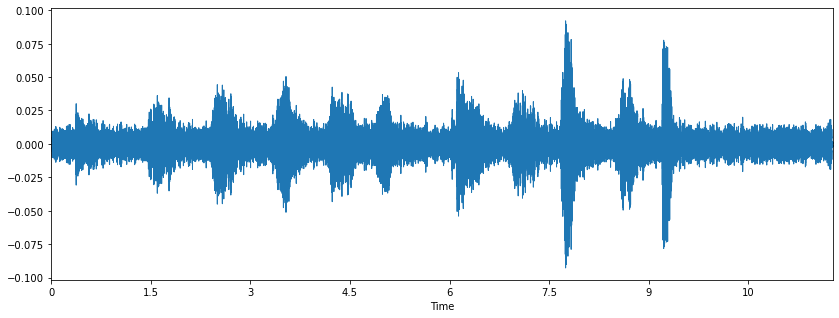

In [184]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

In [187]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames) # frame numbers of estimated onsets
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

[  3  62  68 143 148 209 261 264 299 332 364 367 371 397 401]
[0.06965986 1.43963719 1.57895692 3.32045351 3.43655329 4.85297052
 6.06040816 6.13006803 6.94276644 7.70902494 8.45206349 8.52172336
 8.61460317 9.218322   9.31120181]


In [188]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))

In [45]:
S_full-S_filter

array([[ 1.0921521e-02,  2.4884155e-02,  1.9942975e-02, ...,
         5.2477542e-02,  3.1594396e-02,  1.3031888e-01],
       [-5.0190627e-04,  2.3033492e-02,  2.0851694e-02, ...,
         4.5517147e-02,  7.8451611e-02,  1.4719075e-01],
       [ 3.2152273e-03,  5.4867323e-03,  1.2650526e-02, ...,
         3.8182952e-02,  3.2048516e-02,  1.5083037e-01],
       ...,
       [ 1.3414494e-05,  6.6987227e-06, -8.3255891e-09, ...,
        -7.8809190e-09,  2.5543649e-08,  5.7504835e-06],
       [ 1.3417017e-05,  6.6864909e-06, -1.5399710e-08, ...,
         1.1505023e-08,  6.3012102e-09,  5.7367479e-06],
       [ 1.3426890e-05,  6.7127239e-06, -2.3093335e-08, ...,
        -9.7130801e-09,  6.0825869e-08,  5.8112491e-06]], dtype=float32)

In [53]:
x, sr  = librosa.load("./test.m4a")
S_full, phase = librosa.magphase(librosa.stft(x))
idx = slice(*librosa.time_to_frames([:], sr=sr))
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-53-d41ca7d98545>, line 3)

/Users/zaio/anaconda3/envs/audio/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/zaio/anaconda3/envs/audio/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/zaio/anaconda3/envs/audio/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/zaio/anaconda3/envs/audio/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 

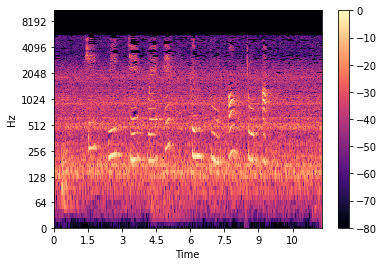

In [56]:
x, sr  = librosa.load("./test.m4a")

S_full, phase = librosa.magphase(librosa.stft(x))
idx = slice(*librosa.time_to_frames([0,15], sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)


In [57]:
# We'll compare frames using cosine similarity, and aggregate similar frames
# by taking their (per-frequency) median value.
#
# To avoid being biased by local continuity, we constrain similar frames to be
# separated by at least 2 seconds.
#
# This suppresses sparse/non-repetetitive deviations from the average spectrum,
# and works well to discard vocal elements.

S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

# The output of the filter shouldn't be greater than the input
# if we assume signals are additive.  Taking the pointwise minimium
# with the input spectrum forces this.
S_filter = np.minimum(S_full, S_filter)
# We can also use a margin to reduce bleed between the vocals and instrumentation masks.
# Note: the margins need not be equal for foreground and background separation
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full
# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Full spectrum')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Background')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[2])
ax[2].set(title='Foreground')
fig.colorbar(img, ax=ax)

/Users/zaio/anaconda3/envs/audio/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/zaio/anaconda3/envs/audio/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/zaio/anaconda3/envs/audio/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


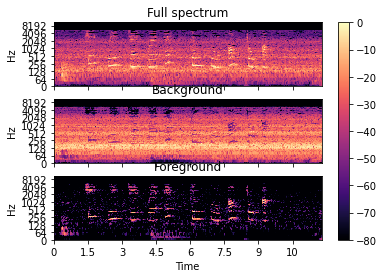

In [65]:
S_foreground

array([[5.67502389e-03, 2.19402798e-02, 1.54235000e-02, ...,
        4.47607860e-02, 2.42551137e-02, 1.30322903e-01],
       [0.00000000e+00, 1.17278248e-02, 9.28592682e-03, ...,
        1.14532160e-02, 4.44224589e-02, 1.29133165e-01],
       [8.72295368e-06, 2.74117792e-05, 2.36218111e-04, ...,
        3.50540737e-04, 2.39511312e-04, 1.28699914e-02],
       ...,
       [1.34399024e-05, 6.71539283e-06, 0.00000000e+00, ...,
        0.00000000e+00, 6.06944883e-10, 5.76466527e-06],
       [1.34396660e-05, 6.70270765e-06, 0.00000000e+00, ...,
        5.52140243e-11, 1.65886298e-11, 5.75105378e-06],
       [1.34453585e-05, 6.72717488e-06, 0.00000000e+00, ...,
        0.00000000e+00, 4.66988759e-09, 5.82569874e-06]], dtype=float32)

In [162]:
mask_v.shape

(1025, 507)

In [163]:
y_hat = librosa.istft(S_foreground)

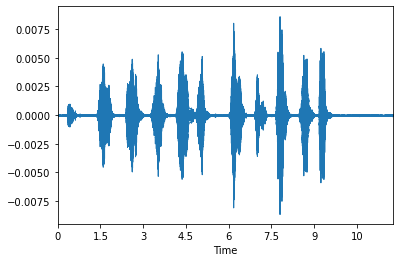

In [164]:
librosa.display.waveplot(y_hat)
plt.show()

In [170]:
o_env = librosa.onset.onset_strength(y_hat, sr=sr)

[  3  15  60 107 142 179 259 330 365 395]
[0.06965986 0.34829932 1.39319728 2.48453515 3.29723356 4.15637188
 6.01396825 7.66258503 8.47528345 9.17188209]


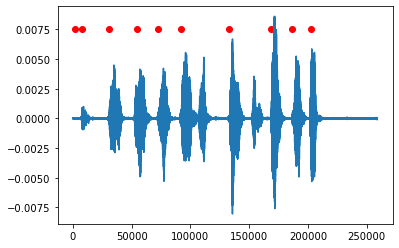

In [213]:
onset_frames = librosa.onset.onset_detect(y_hat, sr=sr, wait = 1,pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames) # frame numbers of estimated onsets
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)
plt.plot(y_hat)
plt.scatter(onset_times*sr,[0.0075]*len(onset_frames),c = "red")

[ 68 106 151 183 218 266 302 333 371 397]
[1.57895692 2.46131519 3.50621315 4.2492517  5.06195011 6.17650794
 7.0124263  7.7322449  8.61460317 9.218322  ]


10

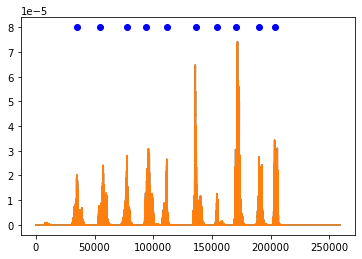

In [222]:
plt.plot(y_hat*y_hat)
onset_frames = librosa.onset.onset_detect(y_hat*y_hat,sr=sr, wait=20)
print(onset_frames) # frame numbers of estimated onsets
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)
plt.plot(y_hat*y_hat)
plt.scatter(onset_times*sr,[0.00008]*len(onset_frames),c = "blue")
len(onset_times)

[  3  15  61  63 107 142 170 180 182 204 210 237 243 259 263 266 298 330
 366 368 395 411 448 462 504]
[ 0.06965986  0.34829932  1.41641723  1.46285714  2.48453515  3.29723356
  3.94739229  4.17959184  4.22603175  4.73687075  4.87619048  5.50312925
  5.64244898  6.01396825  6.10684807  6.17650794  6.91954649  7.66258503
  8.4985034   8.54494331  9.17188209  9.54340136 10.40253968 10.72761905
 11.70285714]


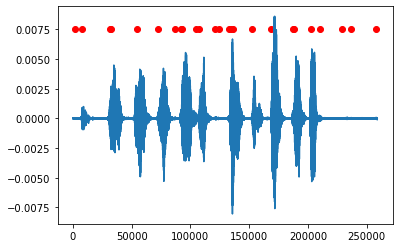

In [210]:
o_env = librosa.onset.onset_strength(y_hat, sr=sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
print(onset_frames) # frame numbers of estimated onsets
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)
plt.plot(y_hat)
plt.scatter(onset_times*sr,[0.0075]*len(onset_frames),c = "red")

[  3  15  61  63 107 142 170 180 182 204 210 237 243 259 263 266 298 330
 366 368 395 411 448 462 504]
[ 0.06965986  0.34829932  1.41641723  1.46285714  2.48453515  3.29723356
  3.94739229  4.17959184  4.22603175  4.73687075  4.87619048  5.50312925
  5.64244898  6.01396825  6.10684807  6.17650794  6.91954649  7.66258503
  8.4985034   8.54494331  9.17188209  9.54340136 10.40253968 10.72761905
 11.70285714]


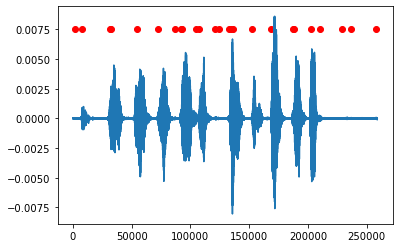

In [211]:
onset_frames = librosa.onset.onset_detect(y_hat, sr=sr)
print(onset_frames) # frame numbers of estimated onsets
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)
plt.plot(y_hat)
plt.scatter(onset_times*sr,[0.0075]*len(onset_frames),c = "red")


In [151]:
onset_times*sr

array([  1536.,   7680.,  31232.,  32256.,  54784.,  72704.,  87040.,
        92160.,  93184., 104448., 107520., 121344., 124416., 132608.,
       134656., 136192., 152576., 168960., 187392., 188416., 202240.,
       210432., 229376., 236544., 258048.])

In [152]:
import IPython.display as ipd
ipd.Audio(x, rate=sr) # load a NumPy array

In [153]:
ipd.Audio(y_hat, rate=sr) # load a NumPy array

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [155]:
from scipy.signal import savgol_filter
y_hat = librosa.istft(S_foreground)
y_hat = savgol_filter(y_hat, 10001, 2) # window size 51, polynomial order 3


In [156]:
from scipy.signal import find_peaks

In [157]:
x = y_hat
peaks, _ = find_peaks(y_hat, height=0.0001)

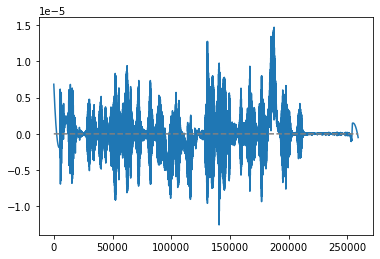

In [158]:
plt.plot(x)

plt.plot(peaks, x[peaks], "x")

plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()